In [1]:
import os
os.chdir("/Users/daniellengyel/Projects/simgrad")

import numpy as np
import matplotlib.pyplot as plt

from functions.ackley import Ackley

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from simplex_grad.simplex_grad import simplex_grad, simplex_grad_mse

import sample_set.CASG.eCASG as eCASG
import sample_set.FFD.FFD as FFD
import sample_set.CFD.CFD as CFD

from functions.cell_div_reduced import CellDivReduced

from numerics.config_utils import generate_configs
from numerics.utils import construct_df, get_loss

from global_model.RBF import RBF

from tqdm import tqdm

%load_ext autoreload
%autoreload 2


In [7]:
F = CellDivReduced()

In [12]:
x0 = F.sample_domain_points(1)[0]

In [13]:
from functions.quadratic import Quadratic
H = F.f2(x0)
g = F.f1(x0)

F_quad = Quadratic(H, np.zeros(len(H)), 0)

In [14]:
Q = H
sig = 1e-3
h = 1e-2
x_0 = np.zeros(len(H))
grad_true = g
S_CASG = eCASG.gen_sample_set(Q, sig, h)
grad_CASG = simplex_grad(F_quad, x_0, S_CASG)
loss_CASG = simplex_grad_mse(S_CASG, grad_est=grad_CASG, grad_true=np.zeros(len(H)), sig=sig)
loss_CASG

0.2704754138038714

In [15]:
S_FFD = FFD.gen_sample_set(Q, sig, h)
grad_FFD = simplex_grad(F_quad, x_0, S_FFD)
loss_FFD = simplex_grad_mse(S_FFD, grad_est=grad_FFD, grad_true=np.zeros(len(H)), sig=sig) 
loss_FFD

8.872241007514514

In [49]:
import pickle
with open('numerics/results/cell_div_res.pkl', 'rb') as f: 
    main_config, N, df, df_quad = pickle.load(f)


In [50]:
keys = ['method', 'sig', 'd', 'N_RBF']
min_h_idx = df.groupby(keys)['median'].idxmin()

In [63]:
df[(df['method'] == 'CASG_rbf') & (df['N_RBF'] == 70) & (df['sig'] == 1e-3)][:20]

,index,sig,h,d,N_RBF,method,median,25pct,75pct,vals
124,4,0.001,1.000,4,70,CASG_rbf,NaN,NaN,NaN,"[10300406023.66111, 1455.7268129888885, 6.4980..."
130,10,0.001,0.100,4,70,CASG_rbf,34.208099,9.337297,248.615379,"[23.835297446261208, 1.688558396585054, 9.8101..."
136,16,0.001,0.010,4,70,CASG_rbf,0.627180,0.343083,2.091106,"[0.5328511844188918, 0.20935035850229403, 0.31..."
142,22,0.001,0.001,4,70,CASG_rbf,8.185386,8.065092,8.806917,"[8.123408780266967, 8.053229143126, 8.19247069..."


In [51]:
result = df.loc[min_h_idx].reset_index(drop=True)

In [52]:
result['method'].unique()

array(['CASG', 'CASG_rbf', 'CFD', 'FFD', 'FFD_rbf', 'loss_RBF'],
      dtype=object)

In [60]:
result[result['method'] == 'CASG_rbf'][:20]


,index,sig,h,d,N_RBF,method,median,25pct,75pct,vals
22,22,0.00001,0.001,4,10,CASG_rbf,0.276482,0.093635,1.106950,"[0.4717086674368546, 1.8834219595174744, 0.055..."
23,22,0.00001,0.001,4,14,CASG_rbf,0.159826,0.062756,0.567362,"[0.1671085636184429, 0.9670597152175275, 0.107..."
24,22,0.00001,0.001,4,21,CASG_rbf,0.077314,0.021733,0.349311,"[0.08513652556752997, 0.7083919496586862, 0.02..."
25,22,0.00001,0.001,4,32,CASG_rbf,0.107690,0.028398,0.453438,"[0.2860661990652293, 0.9862799061573423, 0.021..."
26,22,0.00001,0.001,4,47,CASG_rbf,0.033560,0.013107,0.124955,"[0.1249092804634798, 0.20017167798649305, 0.02..."
27,22,0.00001,0.001,4,70,CASG_rbf,0.012175,0.004011,0.045601,"[0.05881781321388333, 0.10939430469316554, 0.0..."
28,22,0.00001,0.001,4,104,CASG_rbf,0.008520,0.004005,0.031273,"[0.04185180486637571, 0.011085180844951735, 0...."
29,22,0.00001,0.001,4,154,CASG_rbf,0.007661,0.003501,0.031007,"[0.025338166060658, 0.03488500364505707, 0.006..."
30,22,0.00001,0.001,4,229,CASG_rbf,0.006812,0.003528,0.024462,"[0.00564443927835846, 0.030256272392374658, 0...."
31,22,0.00001,0.001,4,338,CASG_rbf,0.005800,0.002831,0.020268,"[0.014952014718400004, 0.015684517741580736, 0..."


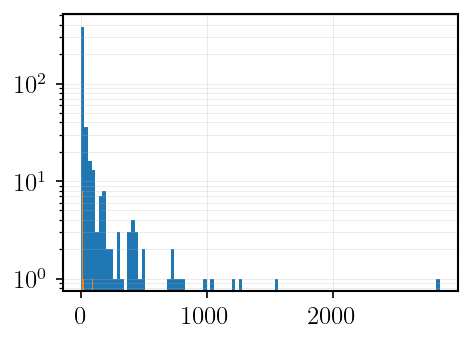

In [56]:
plt.hist(result[result['method'] == 'CASG_rbf'][:20].loc[36]['vals'], bins=100)
plt.hist(result[result['method'] == 'CASG_rbf'][:20].loc[34]['vals'], bins=100)

plt.yscale('log')
plt.show()

sig_1e-05_d_5


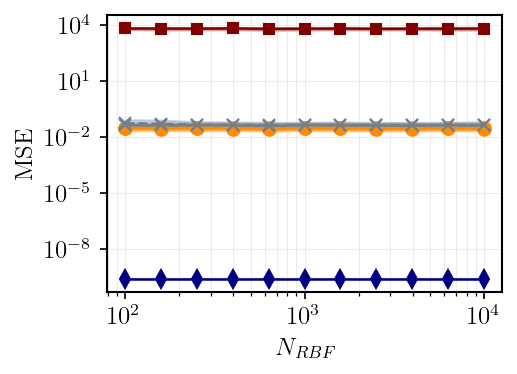

sig_0.001_d_5


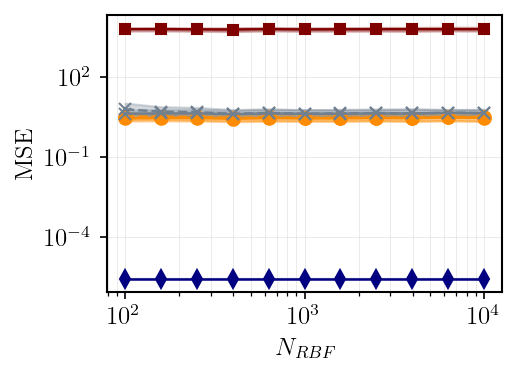

In [49]:
from numerics.utils import plot_figs_N_RBF
plot_figs_N_RBF("CellDiv", df_quad, "numerics")